In [1]:
## 📥 1. Import Libraries & Load Dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for distance-based algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
## ⚙️ 2. Train KNN Model & Test with Different K Values

In [6]:
k_values = range(1, 15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [7]:
# Display results
results = pd.DataFrame({'K': k_values, 'Accuracy': accuracies})
print(results)

     K  Accuracy
0    1  0.977778
1    2  0.977778
2    3  1.000000
3    4  0.977778
4    5  1.000000
5    6  1.000000
6    7  1.000000
7    8  1.000000
8    9  1.000000
9   10  1.000000
10  11  1.000000
11  12  1.000000
12  13  1.000000
13  14  1.000000


In [8]:
## 📈 3. Accuracy vs K Visualization

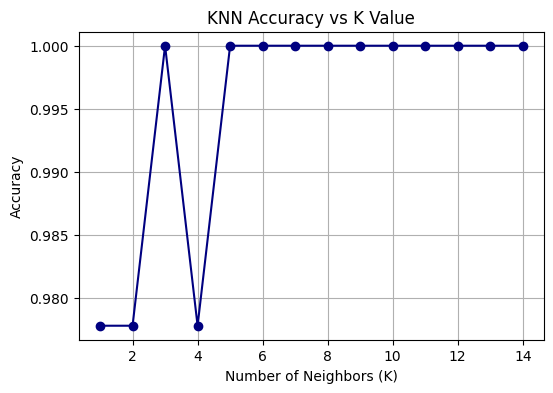

In [9]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o', color='navy')
plt.title('KNN Accuracy vs K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [10]:
best_k = k_values[np.argmax(accuracies)]
print(f'Best K value: {best_k} with accuracy = {max(accuracies):.2f}')

Best K value: 3 with accuracy = 1.00


In [11]:
## 📊 4. Confusion Matrix for Best K

In [12]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

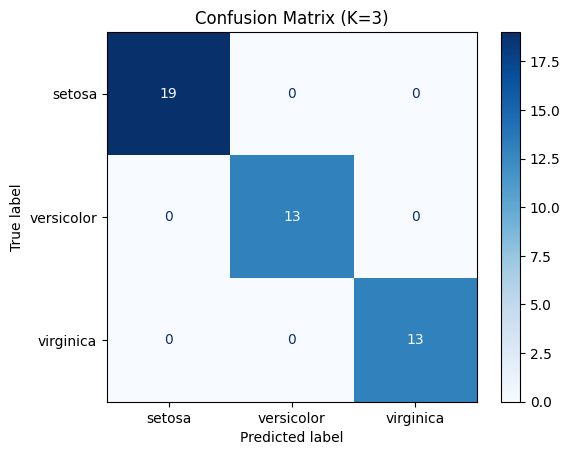

In [13]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

In [14]:
## 🧠 5. Prediction Example

In [15]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example Iris flower
sample_scaled = scaler.transform(sample)
pred_class = best_knn.predict(sample_scaled)[0]
print(f'Predicted Class: {target_names[pred_class]}')

Predicted Class: setosa
